# Linear Regression

## Motivation & Simple Example (y = W.X + b)

### 1. **Data**

In [ ]:
import numpy as np

# Create model parameters (slope, intercept)
weight = 2
bias = 1

# Create range of x values
start = 1
end = 10
step = 0.2

# Create X values
X = np.arange(start, end, step)

# Create Y values
y = weight * X + bias

print(f"First 10 X values:\n {X[:10]}")
print(f"X shape: {X.shape}")
print(f"First 10 Y values:\n {y[:10]}")
print(f"y shape: {y.shape}")


First 10 X values:
 [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]
X shape: (45,)
First 10 Y values:
 [3.  3.4 3.8 4.2 4.6 5.  5.4 5.8 6.2 6.6]
y shape: (45,)


In [49]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (36,)
X_test shape : (9,)
y_train shape: (36,)
y_test shape : (9,)


In [50]:
import matplotlib.pyplot as plt

# Function to plot the data
def plot_data(train_data, train_labels, test_data, test_labels, predictions=None, reg_line=None, X=None):
    plt.title('Linear Regression')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.scatter(train_data, train_labels, color='blue', marker='.', label='Train data')
    plt.scatter(test_data, test_labels, color='green', marker='x', label='Test data')
    if predictions is not None:
        plt.scatter(test_data, predictions, color='red', marker='o', label='Predictions')
        plt.plot(X, reg_line, color='red', label='model')
    plt.legend()

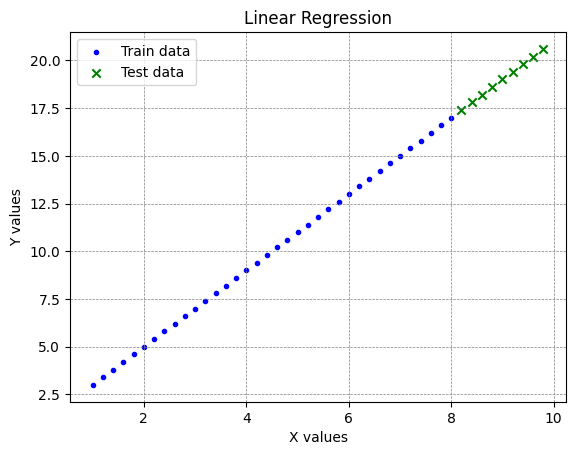

In [51]:
plot_data(X_train, y_train, X_test, y_test)

Imagine we know just the x values and we want to predict the y values. What is the unknowns?

**hint: y = W.X + b**

You can see from the formula that we need to find W and b.

### 2. **Adjusting parameters**

We already know the weight and bias but let's assume we don't know them. We can start with random values and adjust them to find the y values.

In [52]:
# Start with random values for weight and bias
random_weight = np.random.randn()
random_bias = np.random.randn()

print(f"Random weight: {random_weight}")
print(f"Random bias : {random_bias}")

Random weight: -0.10577416029343384
Random bias : -1.217612028557723


Now we have all we need to predict the y values (y = w.x + b). let's find them!

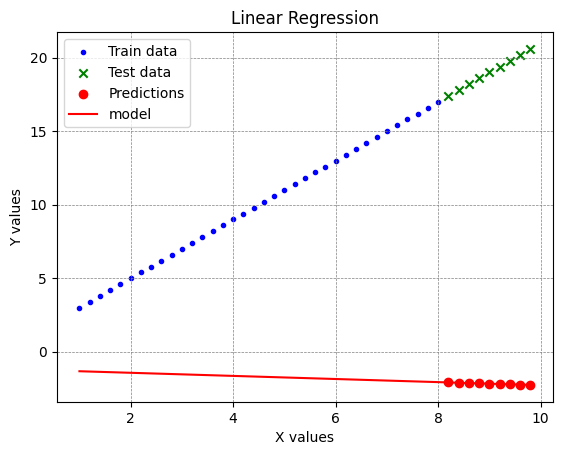

In [53]:
# Predict the y values for the test data
y_preds_test = random_weight * X_test + random_bias
y_preds_data = random_weight * X + random_bias

# let's plot the data along with the prediction 
plot_data(X_train, y_train, X_test, y_test, y_preds_test, y_preds_data, X)

Hmmm, seems like we need to adjust the parameters to get the correct y values.

Following try to adjust the parameters to get the correct y values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Define the function to plot the line
def plot_line(slope, intercept):
    plt.figure(figsize=(8, 6))
    # Predict the y values for the test data
    y_preds_test = slope * X_test + intercept
    y_preds_data = slope * X + intercept

    # let's plot the data along with the prediction 
    plot_data(X_train, y_train, X_test, y_test, y_preds_test, y_preds_data, X)

# Create interactive sliders for slope and intercept
interact(plot_line, slope=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1), 
         intercept=widgets.FloatSlider(min=-10, max=10, step=0.5, value=0))
plt.show()


interactive(children=(FloatSlider(value=1.0, description='slope', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

Good Job! You have found the correct parameters. Now you can predict the y values.

Now you know that the best line is the line that fits the data points and minimizes the difference between the actual y and the predicted y. But can we measure how good the line is?

In [59]:
def plot_error_lines():
    plt.figure(figsize=(8, 6))
    # Predict the y values for the test data
    y_preds_test = random_weight * X_test + random_bias
    y_preds_data = random_weight * X + random_bias

    # let's plot the data along with the prediction 
    plot_data(X_train, y_train, X_test, y_test, y_preds_test, y_preds_data, X)
    for i in range(len(X_test)):
        if i == len(X_test) - 1:
            plt.plot([X_test[i], X_test[i]], [y_test[i], y_preds_test[i]], color='red', linestyle='--', linewidth=1, label='Error (Residuals)')
        else:
            plt.plot([X_test[i], X_test[i]], [y_test[i], y_preds_test[i]], color='red', linestyle='--', linewidth=1)
    plt.legend()

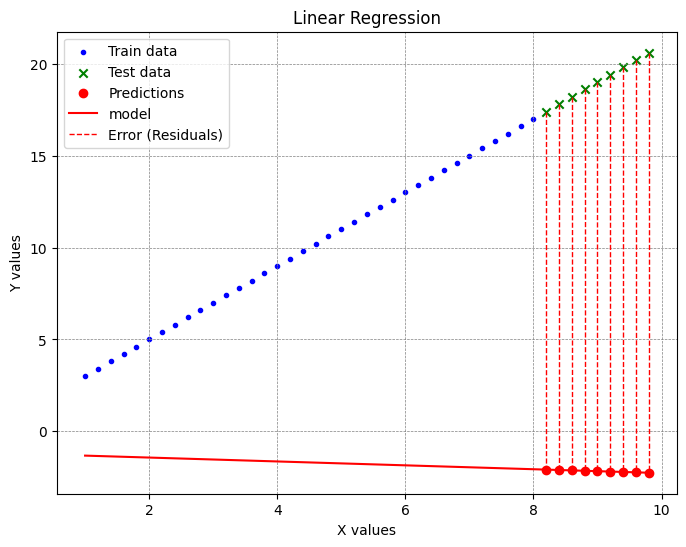

In [60]:
plot_error_lines()
plt.show()

Now our goal is to find the best line that fits the data points. We can measure the goodness of the line by calculating the error between the actual y and the predicted y (*read dotted lines*).

In [61]:
# let's see how good our random weight and bias for predicting the test data.
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [62]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds_test)}")

Mean Squared Error: 449.3335709378368


Let's try adjusting the parameters to minimize the error between the actual y and the predicted y.

In [ ]:
def plot_data_error_cost(weight, bias):
    plt.figure(figsize=(8, 6))
    y_preds_test = weight * X_test + bias
    y_preds_data = weight * X + bias
    y_preds_train = weight * X_train + bias
    plot_data(X_train, y_train, X_test, y_test, y_preds_test, y_preds_data, X)
    for i in range(len(X_test)):
        if i == len(X_test) - 1:
            plt.plot([X_test[i], X_test[i]], [y_test[i], y_preds_test[i]], color='red', linestyle='--', linewidth=1, label='Error (Residuals)')
        else:
            plt.plot([X_test[i], X_test[i]], [y_test[i], y_preds_test[i]], color='red', linestyle='--', linewidth=1)
    plt.legend()
    plt.title(f'MSE train: {mean_squared_error(y_train, y_preds_train).round(2)}  |  MSE test: {mean_squared_error(y_test, y_preds_test).round(2)}')

interact(plot_data_error_cost, weight=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1),
            bias=widgets.FloatSlider(min=-10, max=10, step=0.5, value=0))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='weight', max=5.0, min=-5.0), FloatSlider(value=0.0, …

That's Great! You have found the best line that fits the data points.

Next, we need to make this process automatic. We can use the cost function to measure the error and the gradient descent algorithm to adjust the parameters.